# Clasificador de números en MNIST

Ocuparemos una red convolucional para clasificar el dataset MNIST

In [1]:
import numpy as np
np.random.seed(123)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils  import to_categorical

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Dataset

Este dataset es un estándar para la clasificación de imágenes. Fue recopilado por Yan LeCun y consta de 60k instancias de entrenamiento y 10 de prueba. El dataset de MNIST lo pueden bajar original de la página de Yan LeCun [acá](http://yann.lecun.com/exdb/mnist/). 

Viene prácticamente en todas las bibliotecas de aprendizaje de máquina y nosotros lo vamos a usar de Keras.

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_tr, y_tr), (X_ts, y_ts) = mnist.load_data()

In [4]:
print( X_tr.shape)

(60000, 28, 28)


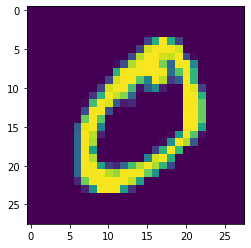

In [5]:
plt.imshow(X_tr[1])

### Ejercicio 1
Conozcan el dataset. Hagan una función que agarre 16 imágenes al azar y las grafique en un arreglo.

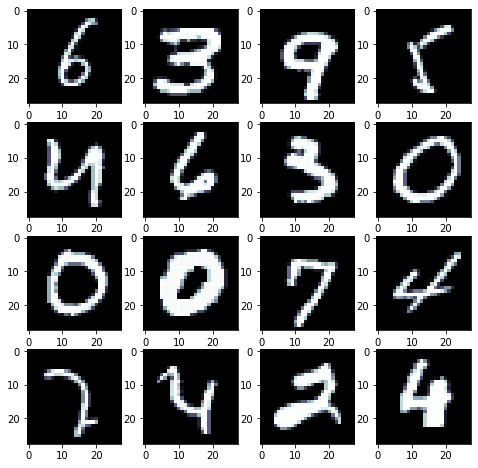

In [56]:
# Definimos el tamaño de las imágenes.
imagen = plt.figure(figsize = (8, 8))
color = plt.get_cmap("bone")

# Visualizamos las 16 imágenes al azar en un arreglo de 4x4.
for i in range (1, 17):
    imagen.add_subplot(4, 4, i)
    rand = np.random.randint(59999)
    plt.imshow(X_tr[rand], cmap = color, interpolation="None")
plt.show()

## Preprocesamiento de los datos

Vamos a convertir nuestras matrices en vectores de dimensión 1. Y como cada imágen va de 0 a 255 y nuestras funciones de activación requieren datos entre 0 y 1, vamos a normalizarlas

In [7]:
X_train = X_tr.reshape(X_tr.shape[0], 28, 28, 1)
X_test = X_ts.reshape(X_ts.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[0].shape

(28, 28, 1)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
print(y_tr[:10])

[5 0 4 1 9 2 1 3 1 4]


Convertimos los datos a categóricos

In [12]:
Y_train = to_categorical(y_tr, 10)
Y_test  = to_categorical(y_ts, 10)

In [13]:
print(y_tr.shape)
print(Y_train.shape)

(60000,)
(60000, 10)


Como pueden ver hubo un cambio en la forma de cada etiqueta de respuesta, en vez de ser un número, paso a ser un vector de tamaño 10 para que podamos usar softmax

## Modelo

Vamos a agregar capas de convolución sobre nuestros datos. Las dimensiones de entrada las pueden ver como un parámetro `Convolution2D`

```python
Convolution2D(... , input_shape=(1,28,28))
```



In [14]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [15]:
print( model.output_shape)

(None, 26, 26, 32)


In [16]:
model.add(Convolution2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Solo pondremos dos capas de parámetro de convolución. Lo que sigue es aplanar la salida del modelo hasta este punto

In [17]:
model.add(Flatten())
model.output_shape

(None, 9216)

Y ahora agregaremos una capa densa, una de dropout y al final la de softmax

In [18]:
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Sólo queda compilarlo

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Entrenamiento y evaluación

In [21]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 173s 92ms/step - loss: 0.1595 - accuracy: 0.9513
Epoch 2/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0822 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0667 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0573 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0484 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0386 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0343 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] 

Ahora debemos evaluar qué tan bien le fue con el conjunto de prueba.

In [22]:
score = model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0585 - accuracy: 0.9857


In [23]:
print("Score {}".format(score))

Score [0.05849617347121239, 0.9857000112533569]


### Ejercicio 2
Agranden su conjunto de entrenamiento construyendo una función que haga una de estas cosas
1. Agregue ruido a cada imagen
2. Que rote la imagen 
3. Que las invierta 
Pueden basarse en esta [liga de SciKit-Learn](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py)

In [27]:
import cv2

# Rotamos las imágenes en un ángulo aleatorio n entre 0 y 15 grados, 
# según las recomendaciones del Profesor. 
n = np.random.randint(0, 16)
nuevos = []

for i in range(0, len(X_tr)):
    # Obtenemos la altura y el ancho. 
    altura, ancho = X_tr[i].shape[0:2]
    # Calculamos el centro de la imagen.
    centro = (ancho / 2, altura / 2)
    # Realizamos la rotación.
    M = cv2.getRotationMatrix2D(centro, n, 1.0)
    imagen_rotada = cv2.warpAffine(X_tr[i], M, (ancho, altura))
    nuevos.append(imagen_rotada)

### Preprocesamiento de datos

In [28]:
# Agrandamos el conjunto de entrenamiento.
X_nuevo = np.concatenate((X_tr, nuevos), axis = 0)
y_nueva = np.concatenate((y_tr, y_tr), axis = 0) 

X_nuevo = X_nuevo.reshape(X_nuevo.shape[0], 28, 28, 1)
X_nuevo = X_nuevo.astype('float32')
X_nuevo /= 255
y_nueva = to_categorical(y_nueva, 10)

### Modelo

In [29]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.output_shape

model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

### Entrenamiento y evaluación

In [30]:
model.fit(X_nuevo, y_nueva, 
          batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, Y_test)

print("Score {}".format(score))

Epoch 1/10
3750/3750 [==============================] - 353s 94ms/step - loss: 0.1430 - accuracy: 0.9566
Epoch 2/10
3750/3750 [==============================] - 320s 85ms/step - loss: 0.0785 - accuracy: 0.9763
Epoch 3/10
3750/3750 [==============================] - 325s 87ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 4/10
3750/3750 [==============================] - 323s 86ms/step - loss: 0.0557 - accuracy: 0.9831
Epoch 5/10
3750/3750 [==============================] - 333s 89ms/step - loss: 0.0497 - accuracy: 0.9849
Epoch 6/10
3750/3750 [==============================] - 324s 87ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 7/10
3750/3750 [==============================] - 334s 89ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 8/10
3750/3750 [==============================] - 462s 123ms/step - loss: 0.0382 - accuracy: 0.9879
Epoch 9/10
3750/3750 [==============================] - 451s 120ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 10/10
313/313 [==============================] 

### Ejercicio 3
Hagan una red neuronal multicapa y comparen la eficiencia de ambas.

In [101]:
from sklearn.datasets import fetch_openml

# Cargamos el conjunto de datos desde https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
X = X / 255.

# Cambiamos la escala de los datos para poder manejarlos.
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [102]:
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal multicapa. 
mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    max_iter = 480, alpha = 1e-4,
                    solver = 'sgd', verbose = 10, 
                    tol = 1e-4, random_state = 1,
                    learning_rate_init = .1)

# Entrenamos a la red neuronal.
mlp.fit(X_train, y_train)

print(X_train.shape, y_train.shape)
print("Puntación del conjunto de entrenamiento: %f" % mlp.score(X_train, y_train))
print("Puntuación del conjunto de prueba:       %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.29472131
Iteration 2, loss = 0.12177005
Iteration 3, loss = 0.08714874
Iteration 4, loss = 0.06943661
Iteration 5, loss = 0.05769795
Iteration 6, loss = 0.04738813
Iteration 7, loss = 0.04063357
Iteration 8, loss = 0.03374012
Iteration 9, loss = 0.02797139
Iteration 10, loss = 0.02464722
Iteration 11, loss = 0.02036596
Iteration 12, loss = 0.01651301
Iteration 13, loss = 0.01448737
Iteration 14, loss = 0.01197540
Iteration 15, loss = 0.00978637
Iteration 16, loss = 0.00857836
Iteration 17, loss = 0.00701300
Iteration 18, loss = 0.00587422
Iteration 19, loss = 0.00499287
Iteration 20, loss = 0.00426864
Iteration 21, loss = 0.00363586
Iteration 22, loss = 0.00316218
Iteration 23, loss = 0.00298604
Iteration 24, loss = 0.00268774
Iteration 25, loss = 0.00250510
Iteration 26, loss = 0.00231729
Iteration 27, loss = 0.00218511
Iteration 28, loss = 0.00202351
Iteration 29, loss = 0.00190881
Iteration 30, loss = 0.00182350
Iteration 31, loss = 0.00175271
Iteration 32, los

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Veamos qué tan bien puede clasificar nuestra red.
print('Exactitud ', accuracy_score(y_test, mlp.predict(X_test)), '\n')
print(classification_report(y_test, mlp.predict(X_test)))

Exactitud  0.98 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### VS

Podemos notar que, con el conjunto original de datos, la exactitud para ambas redes fue de 0.98, la cual es muuuy buena. La única diferencia aquí fue el *tiempo de ejecución*, pues la red convolucional es muchísimo más rápida que la red multicapa. 